***FOR INSTALLATION OF OPENCV_CONTRIB***

In [1]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,318 kB]
Get:14 http://sec

# *Task 1 SIFT Feature Extraction*

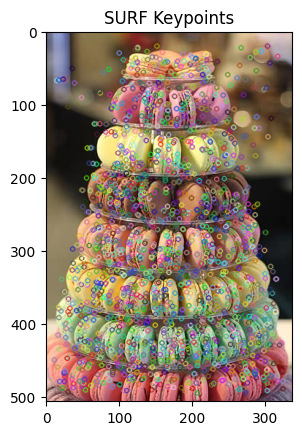

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/img.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()


# *Task 2 Surf Feature Extraction*

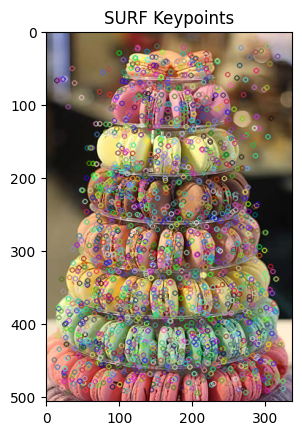

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/img.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector (requires OpenCV contrib package with non-free enabled)
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()


# *Task 3 ORB Feature Extraction*

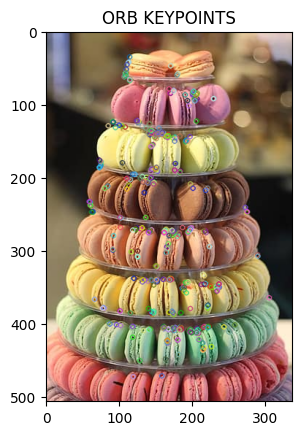

In [4]:
# Read the image
image = cv2.imread("/content/img.jpg") # Added /content to file path

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the result
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("ORB KEYPOINTS")
plt.show()

# *Task 4 Feature Matching*

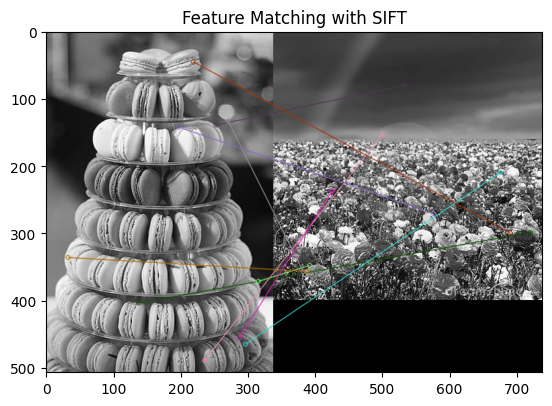

In [5]:
# Load two images
image1 = cv2.imread('/content/img.jpg', 0)
image2 = cv2.imread('/content/img2.jpg', 0)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()


# *Task 5 Applications of Feature Matching*

In [34]:
# Load two images
image1 = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/img2.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Check if a valid homography matrix was found
if M is not None:
    # Warp one image to align with the other
    h, w = image1.shape
    result = cv2.warpPerspective(image1, M, (w, h))

    # Display the result
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Image Alignment using Homography')
    plt.show()
else:
    print("Homography matrix could not be found.")

Homography matrix could not be found.


# *Combining Feature Extraction Methods*

In [35]:
import cv2

# Use SIFT and ORB to extract features from two images

# Load two images
# Ensure correct paths to images
image1 = cv2.imread('/content/img.jpg', 0)
image2 = cv2.imread('/content/img2.jpg', 0)

# SIFT detector
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# ORB detector
orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# *Processed Images*

In [38]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import cv2
import numpy as np

# Assuming you have the following variables from your previous code:
# image_with_keypoints (SIFT), image_with_keypoints (SURF), image_with_keypoints (ORB), image_matches (feature matching)

# Load two images
image1 = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/img2.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Check if a valid homography matrix was found
if M is not None:
    # Warp one image to align with the other
    h, w = image1.shape
    result = cv2.warpPerspective(image1, M, (w, h))

with PdfPages('processed_images.pdf') as pdf:
    plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title("SIFT Keypoints")
    pdf.savefig()
    plt.close()

    plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))  # Replace with your SURF image
    plt.title("SURF Keypoints")
    pdf.savefig()
    plt.close()

    plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))  # Replace with your ORB image
    plt.title("ORB Keypoints")
    pdf.savefig()
    plt.close()

    plt.imshow(image_matches)
    plt.title("Feature Matching with SIFT")
    pdf.savefig()
    plt.close()

    # ensure that result is defined
    if M is not None:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Image Alignment using Homography")
        pdf.savefig()
        plt.close()


print("PDF saved as Exer2.pdf")

PDF saved as Exer2.pdf
